In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, jaccard_similarity_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, mean_squared_error  

from sklearn.pipeline import Pipeline


In [8]:
#Full the data
path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/ChurnData.csv"    
df = pd.read_csv(path)
df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [ ]:
#checking the null value
df.isnull().sum()

In [5]:
y = df["churn"].astype('int')
y[:5]

0    1
1    1
2    0
3    0
4    0
Name: churn, dtype: int32

In [9]:
df.drop("churn",axis=1, inplace=True)
df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,voice,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,1.0,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0


In [11]:
col_name = df.columns
x = pd.DataFrame(StandardScaler().fit(df).transform(df), columns=col_name)
x.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,voice,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat
0,-1.135184,-0.625955,-0.458897,0.475142,1.696129,-0.584778,-0.859727,0.646869,1.564697,-0.749227,...,1.545908,1.623688,-0.886405,1.094442,1.083473,-0.886405,-0.975096,-0.699872,1.281504,1.416309
1,-0.116043,-0.625955,0.034541,-0.328861,-0.643359,-1.144375,-0.859727,-1.545908,-0.639101,-0.237186,...,-0.646869,-0.615882,-0.886405,-0.913708,-0.922958,-0.886405,0.072267,0.038582,-0.604814,-1.369872
2,-0.579289,-0.855944,-0.261522,-0.352278,-1.423189,-0.920536,-0.859727,-1.545908,-0.639101,-0.556578,...,-0.646869,-0.615882,-0.886405,-0.913708,1.083473,-0.886405,-0.482945,0.038582,-0.732700,0.487582
3,0.115580,-0.472629,-0.656272,0.006791,-0.643359,-0.025182,1.163160,0.646869,1.564697,-0.581926,...,1.545908,1.623688,1.128152,1.094442,1.083473,1.128152,-0.539152,2.061302,0.506195,1.416309
4,-1.320483,-0.472629,0.231916,0.038015,-0.643359,0.534415,-0.859727,0.646869,-0.639101,-0.475463,...,1.545908,-0.615882,-0.886405,1.094442,1.083473,-0.886405,-0.319809,-0.492962,0.574135,0.487582


In [13]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20, random_state=0)
print("Train: ",x_train.shape, y_train.shape)
print("Test: ",x_test.shape, y_test.shape)

Train:  (160, 27) (160,)
Test:  (40, 27) (40,)


In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(x_train,y_train)
yhat = LR.predict(x_test)
yhat_prob = LR.predict_proba(x_test)  # this will use to find the probability
# Different numerical optimizers to find parameters, including ‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’ solversdifferent numerical optimizers to find parameters, including ‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’ solvers
print("jaccard_similarity_score %.2f" %jaccard_similarity_score(y_test, yhat))
print(classification_report(y_test, yhat))

jaccard_similarity_score 0.72
              precision    recall  f1-score   support

           0       0.92      0.71      0.80        31
           1       0.44      0.78      0.56         9

    accuracy                           0.73        40
   macro avg       0.68      0.74      0.68        40
weighted avg       0.81      0.72      0.75        40



C:\Users\sjain191\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


- Precision is a measure of the accuracy provided that a class label has been predicted. It is defined by: precision = TP / (TP + FP)
- Recall is true positive rate. It is defined as: Recall = TP / (TP + FN)

So, we can calculate precision and recall of each class.
- F1 score: Now we are in the position to calculate the F1 scores for each label based on the precision and recall of that label. 
The F1 score is the harmonic average of the precision and recall, where an F1 score reaches its best value at 1 (perfect precision and recall) and worst at 0. 
It is a good way to show that a classifer has a good value for both recall and precision.
- And finally, we can tell the average accuracy for this classifier is the average of the F1-score for both labels, which is 0.73 in our case.


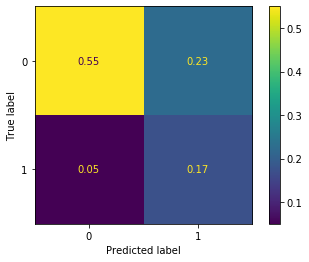

In [23]:
cm = confusion_matrix(y_test, yhat, normalize='all')
cmd = ConfusionMatrixDisplay(cm, display_labels=[0,1])
cmd.plot()

In [26]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat)

9.498343418022232

In [36]:
#Cross Validation of the model
from sklearn.model_selection import cross_val_score, StratifiedKFold
LR = LogisticRegression(C=0.01, solver='liblinear')
skf = StratifiedKFold(n_splits=6,shuffle=False)
cv_score = cross_val_score(LR, x,y, scoring='accuracy', cv=skf)
print("Avg Score of CV %.2f" % cv_score.mean())

Avg Score of CV 0.71
